In [ ]:
!wget https://github.com/layel2/superAI/raw/main/hw-week5/Online%20Retail.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Online Retail.csv')

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [5]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
df['dow'] = df['InvoiceDate'].dt.dayofweek
df['month'] = df['InvoiceDate'].dt.month

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,dow,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [9]:
dow_sales = df.groupby(by = 'dow').agg({'Amount' : 'sum',
                                              'CustomerID' : 'nunique',
                                              'InvoiceNo' : 'nunique'})
dow_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dow_sales['TicketSize'] = dow_sales['Amount'] / dow_sales['InvoiceNo']
dow_sales.reset_index(inplace=True)
dow_sales['dow'] = dow_sales.dow.map(dow_dict)

In [10]:
dow_sales.head()

,dow,Amount,CustomerID,InvoiceNo,TicketSize
0,Monday,1779575.041,1595,3238,549.590809
1,Tuesday,2178632.611,1701,3717,586.126610
2,Wednesday,1851147.810,1778,3865,478.951568
3,Thursday,2203161.240,2007,4408,499.809719
4,Friday,1840340.231,1558,3292,559.034092


Text(0.5, 0, 'Day of Week')

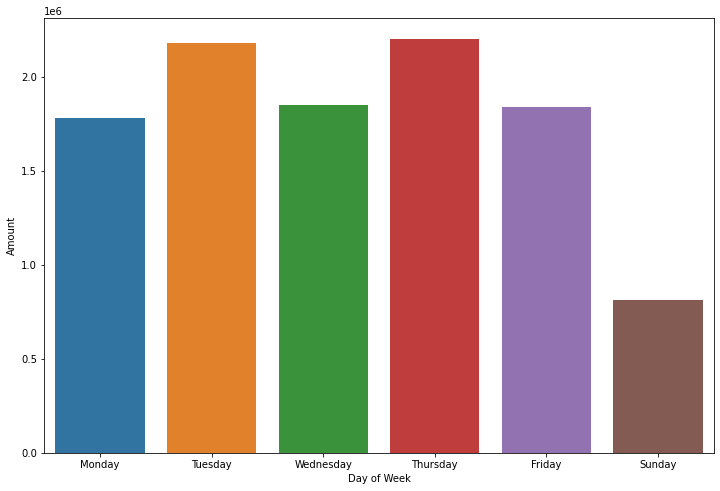

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x='dow',y='Amount',data=dow_sales)
plt.xlabel('Day of Week')

Text(0, 0.5, 'Total customer')

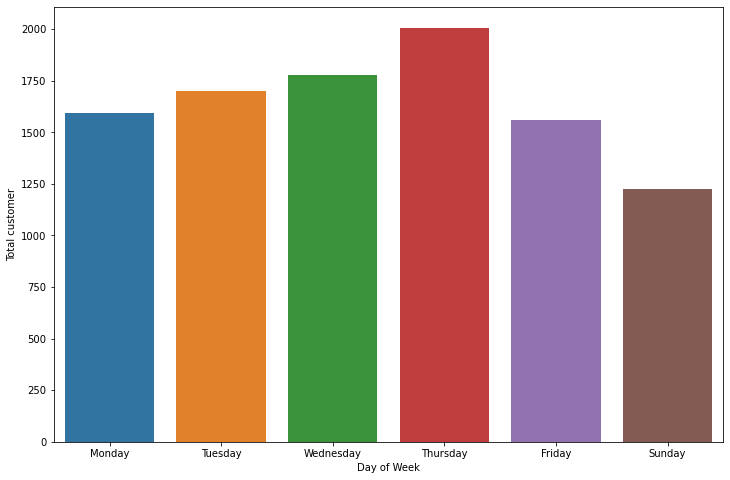

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x='dow',y='CustomerID',data=dow_sales)
plt.xlabel('Day of Week')
plt.ylabel('Total customer')

Text(0.5, 0, 'Day of Week')

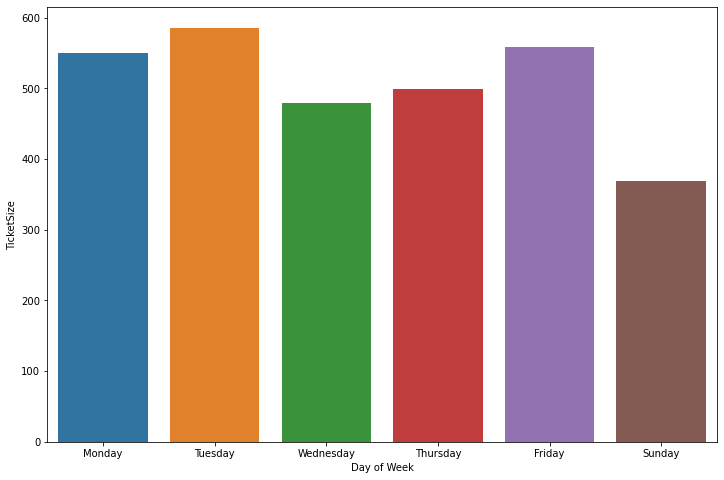

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x='dow',y='TicketSize',data=dow_sales)
plt.xlabel('Day of Week')

In [14]:
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19050
UnitPrice       1292
CustomerID      4339
Country           38
Amount          4907
dow                6
month             12
dtype: int64

In [47]:
stocks = df.groupby(by = 'StockCode').agg({'Amount' : 'sum',
                                              'CustomerID' : 'nunique',
                                              'InvoiceNo' : 'nunique',
                                              'Quantity':'sum'})
stocks['TicketSize'] = stocks['Amount'] / stocks['InvoiceNo']
stocks.reset_index(inplace=True)

In [50]:
stocks

,StockCode,Amount,CustomerID,InvoiceNo,Quantity,TicketSize
0,10002,759.89,40,72,1040,10.554028
1,10080,119.09,19,24,495,4.962083
2,10120,40.53,25,29,193,1.397586
3,10123C,3.25,3,3,5,1.083333
4,10124A,6.72,5,5,16,1.344000
...,...,...,...,...,...,...
3936,gift_0001_20,167.05,0,10,20,16.705000
3937,gift_0001_30,175.53,0,8,37,21.941250
3938,gift_0001_40,100.70,0,3,3,33.566667
3939,gift_0001_50,167.56,0,4,4,41.890000


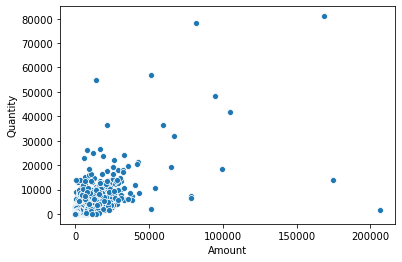

In [52]:
sns.scatterplot(x='Amount',y='Quantity',data=stocks)

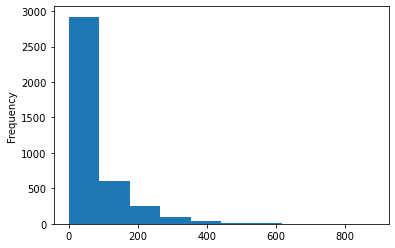

In [58]:
stocks['CustomerID'].plot.hist(bins=10)

In [64]:
country_sales = df.groupby(by=['Country']).agg({'Amount' : 'sum',
                                              'CustomerID' : 'nunique'}).reset_index()

Text(0, 0.5, 'Total customer')

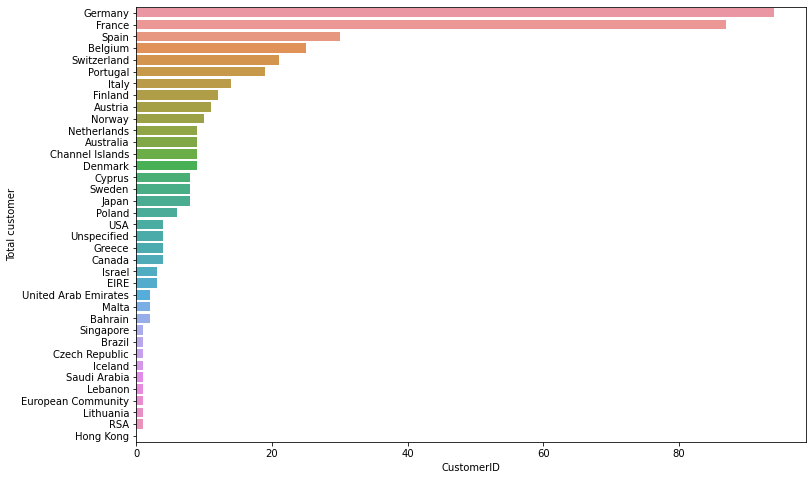

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'Country', x='CustomerID', 
            data = country_sales[country_sales['Country']!= 'United Kingdom'].sort_values('CustomerID', ascending=False))
plt.ylabel('Total customer')

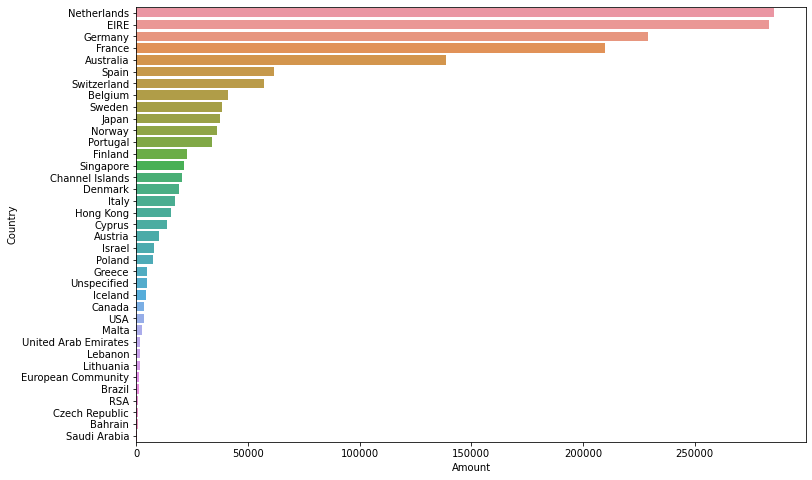

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'Country', x='Amount', 
            data = country_sales[country_sales['Country']!= 'United Kingdom'].sort_values('Amount', ascending=False))

## **Dashboard**

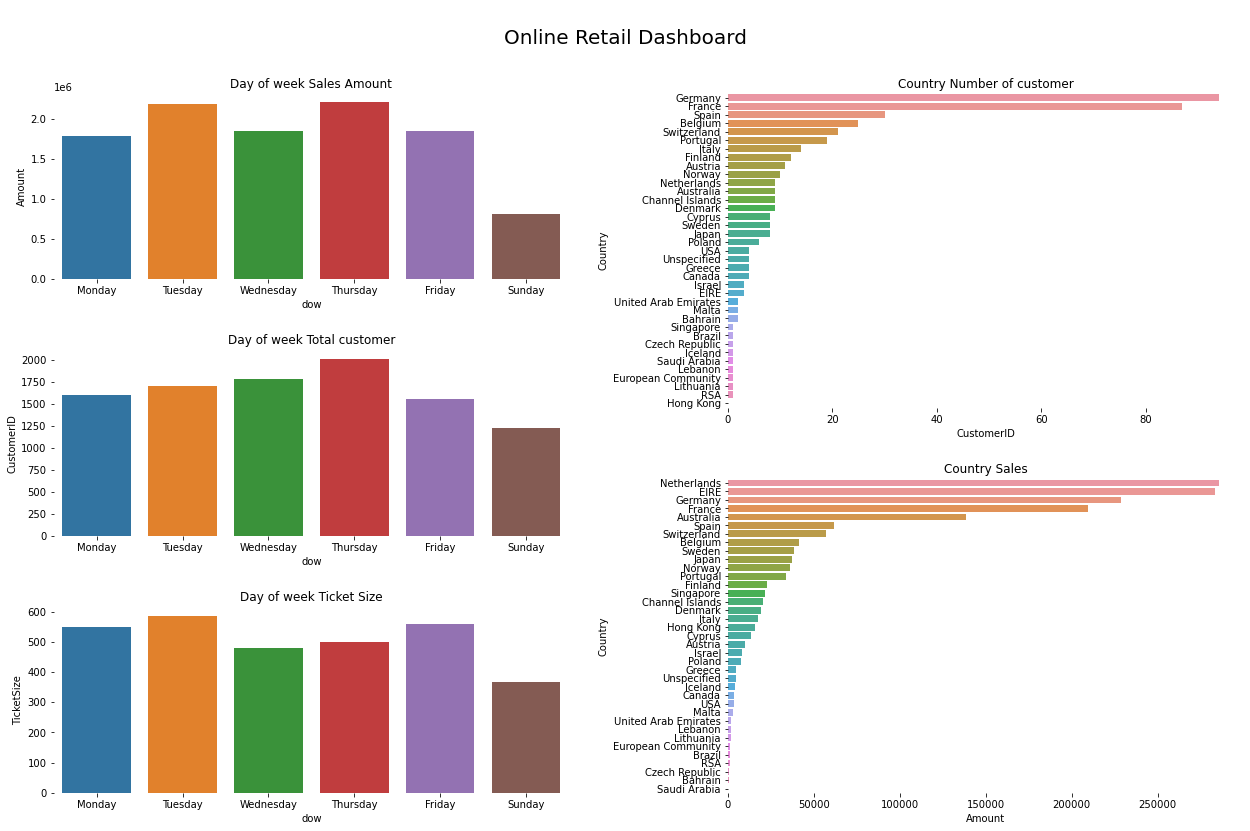

In [93]:
fig, ax = plt.subplots(6, 2, figsize=(18,12))
gs = ax[1, 1].get_gridspec()
for aa in ax:
    for a in aa:
        a.remove()
axsm0 = fig.add_subplot(gs[:2, 0])
axsm1 = fig.add_subplot(gs[2:4, 0])
axsm2 = fig.add_subplot(gs[4:6, 0])
axbig0 = fig.add_subplot(gs[:3, -1])
axbig1 = fig.add_subplot(gs[3:, -1])

sns.barplot(x='dow',y='Amount',data=dow_sales, ax = axsm0)
#plt.xlabel('Day of Week')
sns.barplot(x='dow',y='CustomerID',data=dow_sales, ax = axsm1)
sns.barplot(x='dow',y='TicketSize',data=dow_sales, ax = axsm2)
sns.barplot(y = 'Country', x='CustomerID', ax = axbig0, 
            data = country_sales[country_sales['Country']!= 'United Kingdom'].sort_values('CustomerID', ascending=False))
sns.barplot(y = 'Country', x='Amount', ax = axbig1, 
            data = country_sales[country_sales['Country']!= 'United Kingdom'].sort_values('Amount', ascending=False))


axsm0.set_title('Day of week Sales Amount')
axsm1.set_title('Day of week Total customer')
axsm2.set_title('Day of week Ticket Size')
axbig0.set_title('Country Number of customer')
axbig1.set_title('Country Sales')

plt.tight_layout(pad=3.0)
fig.suptitle('\nOnline Retail Dashboard', fontsize=20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom = True, left = True)


plt.show()